Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


### Class 16 - Test P2: multiple degrees of freedom and continuous systems

[P2:2019](#P2_2019) - 
[Question 1](#P2_2019_1), 
[Question 2](#P2_2019_2), 
[Question 3](#P2_2019_3), 
[Question 4](#P2_2019_4).

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sc


## P2:2019 <a name="P2_2019"></a> 

### Question 1  <a name="P2_2019_1"></a> 

A structural system is modelled as a discrete two d.o.f. system, as shown in the figure. Each column has flexural rigidity $EI = 500{\rm kNm^2}$, length $L = 4{\rm m}$, and are assumed to have no relevant mass. The floor beams are assumed to be perfectly stiff and to have total (lumped) mass $m = 4{\rm ton}$ each. The system is assumed to present a viscous damping with ratio of critical $\zeta = 0.01$ in all vibration modes. 

1. Define the stiffness, the mass, and the damping system matrices (1 pts).  
2. Determine and sketch the two natural vibration modes, indicating the associated vibration frequencies (2 pts). 

<img src="tests/P2_2019_figs1e2.png" alt="P2_2019_figs1e2" width="360px"/>

**Answer:** The stiffness and mass matrices are:


In [2]:
EI =  500000.          # single column flexural rigidity
m  =  4000.            # single floor mass
L  =  4                # column length

k  =  12*EI/L**3       # single column stiffness

KG = np.array([[ 2*k, -2*k],
               [-2*k,  4*k]])   # global stiffness matrix

MG = np.array([[   m,    0],
               [   0,    m]])   # global mass matrix

print('Global stiffness matrix:\n\n', KG)
print('\nGlobal mass matrix:\n\n', MG)


Global stiffness matrix:

 [[ 187500. -187500.]
 [-187500.  375000.]]

Global mass matrix:

 [[4000.    0.]
 [   0. 4000.]]


To specify the damping matrix, we must first calculate the vibration modes and frequencies.


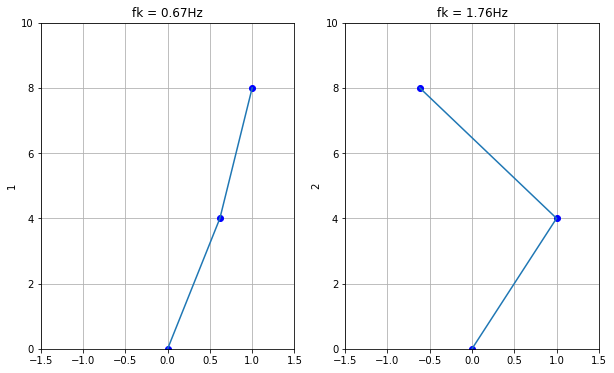

In [3]:
# Uses scipy to solve the standard eigenvalue problem
w2, Phi = sc.eig(KG, MG)

# Ensure ascending order of eigenvalues
iw  = w2.argsort()
w2  = w2[iw]
Phi = Phi[:,iw]

# Eigenvalues to vibration frequencies
wk  = np.sqrt(np.real(w2)) 
fk  = wk/2/np.pi

plt.figure(1, figsize=(10,6), clear=True)
x = np.arange(0,12,4)

for k in range(2):
    pk = np.zeros(3)
    pk[1:] = Phi[::-1,k]
    pk /= np.max(np.abs(pk))   # adjust scale for unity amplitude
    
    plt.subplot(1,2,k+1)
    plt.plot(pk, x, 'bo')
    plt.plot(pk, x)
    
    plt.xlim(-1.5, 1.5);  plt.ylabel(str(k+1));
    plt.ylim( 0.0, 10.);
    plt.title('fk = {0:4.2f}Hz'.format(fk[k]));
    plt.grid(True)


And now we can calculate the coefficients that multiply the stiffness and mass matrices
to build a Rayleigh damping matrix that is also orthogonalized by the eigenvectors:


In [4]:
zeta  =  np.array([0.01, 0.01])         # damping for two modes i and j

A     =  np.array([[1/wk[0], wk[0]], [1/wk[1], wk[1]]])/2
alpha =  np.linalg.solve(A, zeta)

CG    =  alpha[0]*MG + alpha[1]*KG      # Rayleigh viscous damping matrix

print('Mass matrix coefficient a0:        {0:6.5f}'.format(alpha[0]))
print('Stiffness matrix coefficient a1:   {0:6.5f}'.format(alpha[1]))

print('\nRayleigh damping matrix original:\n\n', CG)
print('\nRayleigh damping matrix orthogonalized:\n\n', np.dot(Phi.T, np.dot(CG, Phi)))


Mass matrix coefficient a0:        0.06124
Stiffness matrix coefficient a1:   0.00131

Rayleigh damping matrix original:

 [[ 489.89794856 -244.94897428]
 [-244.94897428  734.84692283]]

Rayleigh damping matrix orthogonalized:

 [[338.51115694   0.        ]
 [  0.         886.23371445]]


### Question 2 <a name="P2_2019_2"></a> 

The system is now subjected to an initial kinematic condition, which consists of an imposed displacement on the lower floor, $u_{20} = 1{\rm cm}$, only, and it is then released to vibrate. Accounting for the two vibration modes, calculate the peak displacement and the peak acceleration at the system upper floor caused by this initial condition (2 pts). 

**Answer:** For the modal superposition we must firstly calculate the modal masses
and the modal stiffnesses:


In [5]:
Kk = np.diag(np.dot(Phi.T, np.dot(KG, Phi)))
Mk = np.diag(np.dot(Phi.T, np.dot(MG, Phi)))

print('Modal masses:      [{0:6.0f}  {1:6.0f}]'.format(*Mk))
print('Modal stiffnesses: [{0:6.0f}  {1:6.0f}]'.format(*Kk))


Modal masses:      [  4000    4000]
Modal stiffnesses: [ 71619  490881]


The initial condition is of displacement type (no initial velocity), what implies a
cosine type response. 

Recalling that $\Phi$ is a orthogonal matrix, it means that its transpose is equal to its inverse:

\begin{align*}
\vec{u}(t)   &= \Phi \; \vec{u}_k(t) \\
\vec{u}_k(t) &= \Phi^{\intercal} \; \vec{u}(t)
\end{align*}

where $\vec{u}(t)$ is the _nodal_ response and $\vec{u}_k(t)$ is the _modal_ response.
The initial modal displacements are simply given by:


In [6]:
u0  = np.array([0.00, 0.01])   # initial displacements in nodal coordinates
u0k = np.dot(Phi.T, u0)        # initial displacements in modal coordinates

print('Initial modal displacement at mode 1: {0:8.6f}'.format(u0k[0]))
print('Initial modal displacement at mode 2: {0:8.6f}'.format(u0k[1]))


Initial modal displacement at mode 1: 0.005257
Initial modal displacement at mode 2: 0.008507


The total response is a superposition of modal responses, which are cosine functions with
the respective frequencies and amplitudes:


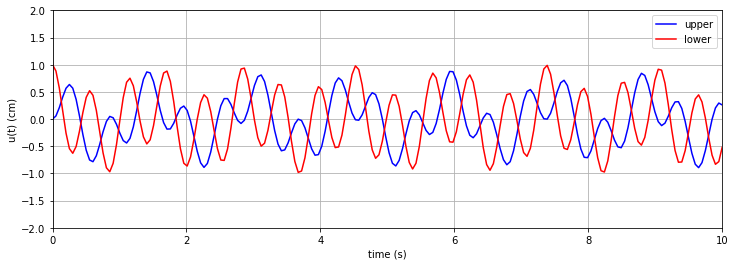

In [7]:
T  = 10
N  = 200
t  = np.linspace(0, T, N)                   # time domain

uk = np.array([u0k[0]*np.cos(wk[0]*t),
               u0k[1]*np.cos(wk[1]*t)])     # modal responses

u  = np.dot(Phi, uk)*100                    # total responses (cm)

plt.figure(2, figsize=(12, 4), clear=True)
plt.plot(t, u[0,:], 'b', t, u[1,:], 'r')

plt.xlim( 0, T);  plt.xlabel('time (s)') 
plt.ylim(-2, 2);  plt.ylabel('u(t) (cm)') 
plt.legend(('upper','lower'))

plt.grid(True) 


The accelerations are obtained from the twofold derivative of the cosine sum:


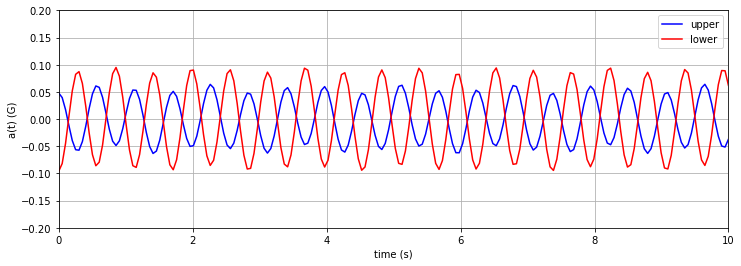

In [8]:
ak = np.array([-u0k[0]*wk[0]*wk[0]*np.cos(wk[0]*t),
               -u0k[1]*wk[1]*wk[1]*np.cos(wk[1]*t)])    # modal accelerations

a  = np.dot(Phi, ak)/9.81                               # nodal accelerations (G)

plt.figure(3, figsize=(12, 4), clear=True)
plt.plot(t, a[0,:], 'b', t, a[1,:], 'r')

plt.xlim(   0,   T);  plt.xlabel('time (s)') 
plt.ylim(-0.2, 0.2);  plt.ylabel('a(t) (G)') 
plt.legend(('upper','lower'))

plt.grid(True) 


Finnaly, answering the question, the peak displacement and acceleration amplitudes in
the upper floor are:


In [9]:
print('Peak upper displacement: {0:5.3f}cm'.format(u[0,:].max()))
print('Peak upper acceleration: {0:5.3f}G '.format(a[0,:].max()))


Peak upper displacement: 0.876cm
Peak upper acceleration: 0.064G 


It can be seen that, as expected, the second mode dominate the structural response.


### Question 3 <a name="P2_2019_3"></a> 

The cantilever beam shown in the figure has a constant flexural stiffness $EI = 1000{\rm kNm^2}$ and mass per unit length $\mu = 200{\rm kg/m}$. 

1. Propose a function that resembles the first vibration mode. Calculate the associated potential elastic energy $V$ and the reference kinetic energy, $T_{\rm ref}$. With these energies, estimate the natural vibration frequency for the first mode using the Rayleigh quocient (2 pts).  
2. Calculate the modal mass and the modal stiffness and then use these parameters to estimate the static displacement at the beam center, caused by a point load $W = 10{\rm kN}$ placed at this same position (1 pts). 

<img src="tests/P2_2019_figs3e4.png" alt="P2_2019_figs3e4" width="360px"/>

**Answer:** We will try and compare two different solutions: a parabolic and a sinusoidal functions.
They are:

$$ \varphi_1(x) = \frac{1}{27} \;(x - 3)(x - 9) $$

and

$$ \varphi_2(x) = \frac{\sqrt 2}{2} - \sin \left( \frac{\pi x}{12} \right) $$

Both tentative solutions respect the kinetic condition of zero displacement at supports
(located ate coordinates $x = 3$m and $x = 9$m.
The script below shows a comparison plot:


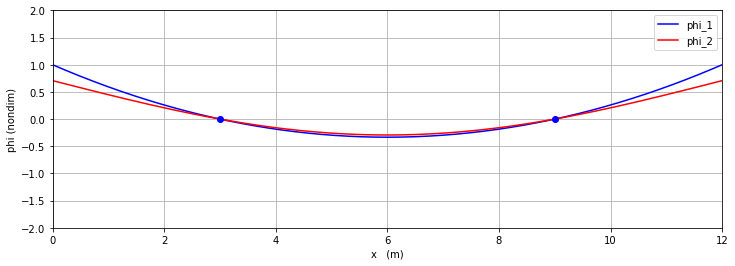

In [10]:
EI  =  1000000.                             # flexural stiffness
mu  =  200.                                 # mass per unit length
L   =  12.                                  # total length
N   =  200                                  # number of segments
X   =  np.linspace(0, L, N)                 # length discretization

ph1 =  lambda x: (x - 3)*(x - 9)/27                    # first solution
ph2 =  lambda x: np.sqrt(2)/2 - np.sin(np.pi*(x/12))   # second solution

plt.figure(4, figsize=(12, 4), clear=True)
plt.plot(X, ph1(X), 'b', X, ph2(X), 'r')
plt.plot([3, 9], [0 , 0], 'bo')

plt.xlim( 0, L);  plt.xlabel('x   (m)') 
plt.ylim(-2, 2);  plt.ylabel('phi (nondim)') 
plt.legend(('phi_1','phi_2'))

plt.grid(True) 


The sine function has an important feature, which is zero curvature at cantilever tips where
bending moments must be zero. 
The parabolic function is the simplest, but presents constant curvature along all beam length.

The rotations are calculated as:

$$ \phi_1^{\prime}(x) = \frac{1}{27} (2x - 12) $$

and:

$$ \phi_2^{\prime}(x) = -\frac{\pi}{12} \; \cos \left( \frac{\pi x}{12} \right) $$

while the curvatures are given by:

$$ \phi_1^{\prime\prime}(x) = \frac{2}{27} $$

and:

$$ \phi_2^{\prime\prime}(x) = -\frac{\pi^2}{144} \; \sin \left( \frac{\pi x}{12} \right) $$

The script below compares the curvatures for each solution:


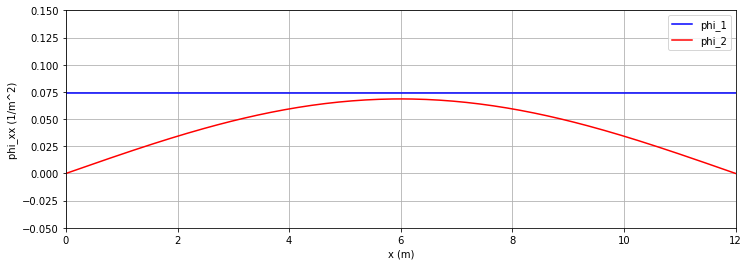

In [11]:
ph1xx = lambda x: (2/27)*x**0                            # first solution
ph2xx = lambda x: (np.pi*np.pi/144)*np.sin(np.pi*x/12)   # second solution

plt.figure(5, figsize=(12, 4), clear=True)
plt.plot(X, ph1xx(X), 'b', X, ph2xx(X), 'r')

plt.xlim(    0,    L);  plt.xlabel('x (m)') 
plt.ylim(-0.05, 0.15);  plt.ylabel('phi_xx (1/m^2)') 
plt.legend(('phi_1','phi_2'))

plt.grid(True) 


The curvatures are quite close at the center, but it is overestimated by the parabolic function
at the cantilever tips.

The potential elastic and the reference kinetic energy finally are:


In [12]:
dx = L/N

V1 = EI*np.trapz(ph1xx(X)*ph1xx(X), dx=dx)/2
V2 = EI*np.trapz(ph2xx(X)*ph2xx(X), dx=dx)/2

T1 = mu*np.trapz(ph1(X)*ph1(X), dx=dx)/2
T2 = mu*np.trapz(ph2(X)*ph2(X), dx=dx)/2

print('Potential elastic energy for solution 1: {0:5.1f}J'.format(V1))
print('Potential elastic energy for solution 2: {0:5.1f}J\n'.format(V2))

print('Reference kinetic energy for solution 1: {0:5.1f}J'.format(T1))
print('Reference kinetic energy for solution 2: {0:5.1f}J'.format(T2))


Potential elastic energy for solution 1: 32757.2J
Potential elastic energy for solution 2: 14022.3J

Reference kinetic energy for solution 1: 203.5J
Reference kinetic energy for solution 2: 119.0J


And the natural vibration frequencies estimated with Rayleigh quotient are:


In [13]:
wn1 = np.sqrt(V1/T1)
wn2 = np.sqrt(V2/T2)

fn1 = wn1/2/np.pi
fn2 = wn2/2/np.pi

print('Natural vibration frequency for solution 1: {0:5.2f}Hz'.format(fn1))
print('Natural vibration frequency for solution 2: {0:5.2f}Hz'.format(fn2))


Natural vibration frequency for solution 1:  2.02Hz
Natural vibration frequency for solution 2:  1.73Hz


If one recalls that the true vibration mode minimizes the Rayleigh quotient, the lowest value
obtained with the sinusoidal function is likely to be closer to the exact solution.
The relative error between both tentative functions is approximately 17% and the
correct natural frequency must be a little below 1.73Hz.

Now, we will proceed with the calculation of modal mass and modal stiffness:


In [14]:
Mk1 = mu*np.trapz(ph1(X)*ph1(X), dx=dx)   # modal mass and
Kk1 = Mk1*wn1**2                          #    stiffness for solution 1

Mk2 = mu*np.trapz(ph2(X)*ph2(X), dx=dx)   # modal mass and
Kk2 = Mk2*wn2**2                          #    stiffness for solution 2


For static analysis, the modal displacement is obtained from modal 
force divided by modal stiffness:


In [15]:
W   = -10000.        # point load (downwards)

Fk1 =  W*ph1(6)      # modal (static) force
Fk2 =  W*ph2(6)

uk1 =  Fk1/Kk1       # modal displacement
uk2 =  Fk2/Kk2

u1  =  uk1*ph1(12)   # displacement at cantilever tip
u2  =  uk2*ph2(12)

print('Static displacement of cantilever tip for solution 1: {0:5.2f}cm'.format(u1*100))
print('Static displacement of cantilever tip for solution 2: {0:5.2f}cm'.format(u2*100))


Static displacement of cantilever tip for solution 1:  5.09cm
Static displacement of cantilever tip for solution 2:  7.38cm


The error in the displacement at cantilever tip for the two solutions is quite high, 
over 40%, for the two tentative functions diverge noticeably in that position. 

A comparison of displacement solutions for the whole beam is shown below:


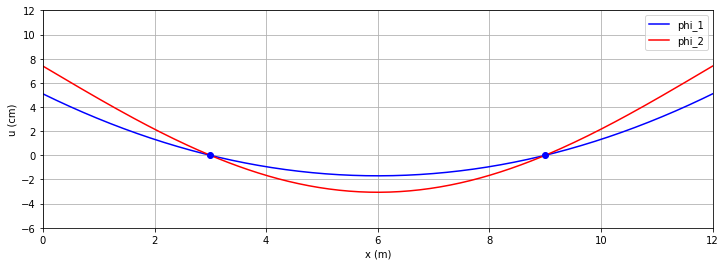

In [16]:
plt.figure(6, figsize=(12, 4), clear=True)
plt.plot(X, 100*uk1*ph1(X), 'b', X, 100*uk2*ph2(X), 'r')
plt.plot([3, 9], [0 , 0], 'bo')

plt.xlim( 0,  L);  plt.xlabel('x (m)') 
plt.ylim(-6, 12);  plt.ylabel('u (cm)') 
plt.legend(('phi_1','phi_2'))

plt.grid(True) 


### Question 4 <a name="P2_2019_4"></a> 

The same point load from previous question is now applied suddenly from zero to its final magnitude, what causes a dynamic amplification on the beam displacements.  Estimate the peak displacement and the peak acceleration at the cantilever tip (2 pts).

**Answer:** The solution for some impulsive loading is well known to be the static solution
multiplied by a dynamic amplification factor. In the case of a step load (Heaviside's
function) this amplification factor is 2. Hence:


In [17]:
print('Dynamic displacement of cantilever tip for solution 1: {0:5.2f}cm'.format(2*u1*100))
print('Dynamic displacement of cantilever tip for solution 2: {0:5.2f}cm'.format(2*u2*100))


Dynamic displacement of cantilever tip for solution 1: 10.18cm
Dynamic displacement of cantilever tip for solution 2: 14.77cm


The peak accelerations are:


In [18]:
ak1 = uk1*wn1**2
ak2 = uk2*wn2**2

a1  = ak1*ph1(12)
a2  = ak2*ph2(12)

print('Acceleration at cantilever tip for solution 1: {0:5.3f}G'.format(a1/9.81))
print('Acceleration at cantilever tip for solution 2: {0:5.3f}G'.format(a2/9.81))


Acceleration at cantilever tip for solution 1: 0.835G
Acceleration at cantilever tip for solution 2: 0.887G


It is observed that the error in the acceleration response at cantilever tip, 
approximately 6%, is not as high as for the displacement response. 
